In [2]:
import cv2
import copy
from time import time
from geotiff import GeoTiff as gt
import tensorly as tl
import tensorly.decomposition as td
from tensorly.decomposition._nn_cp import initialize_nn_cp
import numpy as np
from numba import jit
from tensorly import random

%matplotlib inline 
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


Bad key text.latex.preview in file /home/user/anaconda3/envs/datasc3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/user/anaconda3/envs/datasc3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/user/anaconda3/envs/datasc3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # w

In [1]:
from cmtf4si import cmtf4si
from helpers import *
from UIhandler import *

In [4]:
fname = 'moon1.tif'
# tifread = gt('../SATDATA/MI_data/'+fname,crs_code=4326)
# img = np.array(tifread.read())

img = cv2.imread('./images/'+fname)

# img = np.load('../SATDATA/otherRawData.npy')

imSize = img.shape





In [8]:
perc = 20
corrupt_img, m1 = randomDelete(img, perc/100)

imgdummy = copy.deepcopy(corrupt_img)
# change contrast param according to data.
contrast_param = 0.01
imgdummy = np.array(imgdummy[:,:,:3]*contrast_param)


# Draw a HiL mask. Use 'o'/'p' to zoom in/out, LMB to draw.
Zt,Z = drawMask(imgdummy)


Z = np.array(Z,dtype=float)
temp_mask = (Z == 255) # this value is set in UIhandler.py
imputation_val = np.average(corrupt_img).astype('float')
print("Imputation val = ",imputation_val)
Z[temp_mask] = imputation_val


Ybase = corrupt_img[:,:,0]
Yhil= tempimg[:,:,0]*m1 + Z*~m1


Imputation val =  11.678288777669271


In [16]:
alph = 25
_,baseImg,_ = cmtf4si(corrupt_img, Ybase, 0, 10, m1) 
_,hilImg,_ = cmtf4si(corrupt_img, Yhil, 0, 10, m1, alpha=alph)

print('Baseline RSE: ', RSE(img,baseImg))
print('CMTF4SI RSE: ', RSE(img,hilImg))

0.3681162723525125
0.3325258165179236


TIFFOpen: ./output_newest/alpha_25_perc_20_base_moon1.tif: No such file or directory.
TIFFOpen: ./output_newest/alpha_25_perc_20_hil_moon1.tif: No such file or directory.


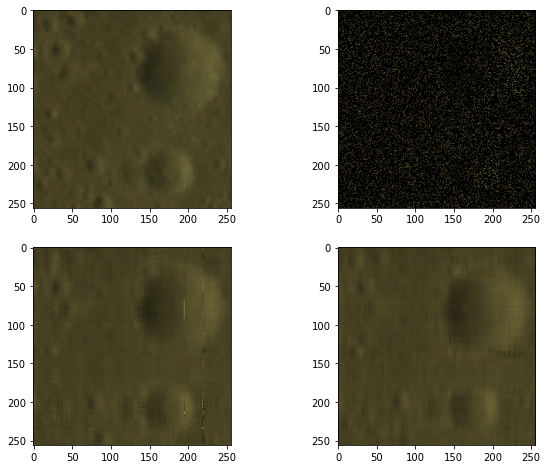

In [17]:
mult_fac = 1
original = cv2.cvtColor((img[:,:,:3]*mult_fac).astype(np.uint8), cv2.COLOR_BGR2RGB) 
corrupt = cv2.cvtColor((X_px[:,:,:3]*mult_fac).astype(np.uint8), cv2.COLOR_BGR2RGB)
cm = cv2.cvtColor((baseImg[:,:,:3]*mult_fac).astype(np.uint8), cv2.COLOR_BGR2RGB)
cmh = cv2.cvtColor((hilImg[:,:,:3]*mult_fac).astype(np.uint8), cv2.COLOR_BGR2RGB)


f, axarr = plt.subplots(2,2)

cv2.imwrite('./output_newest/alpha_'+str(alph)+'_perc_'+str(perc)+'_base_'+fname, cv2.cvtColor(cm,cv2.COLOR_BGR2RGB))
cv2.imwrite('./output_newest/alpha_'+str(alph)+'_perc_'+str(perc)+'_hil_'+fname, cv2.cvtColor(cmh,cv2.COLOR_BGR2RGB))

axarr[0,0].imshow(original)
axarr[0,1].imshow(corrupt)
axarr[1,0].imshow(cm)
axarr[1,1].imshow(cmh)


plt.show()
